In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import scipy.integrate
import scipy.stats
import matplotlib.pyplot as plt
import edgeworth
import time

from matplotlib import rc
rc('text', usetex=True)


## Expr 1 Laplace Distribution

<IPython.core.display.Javascript object>


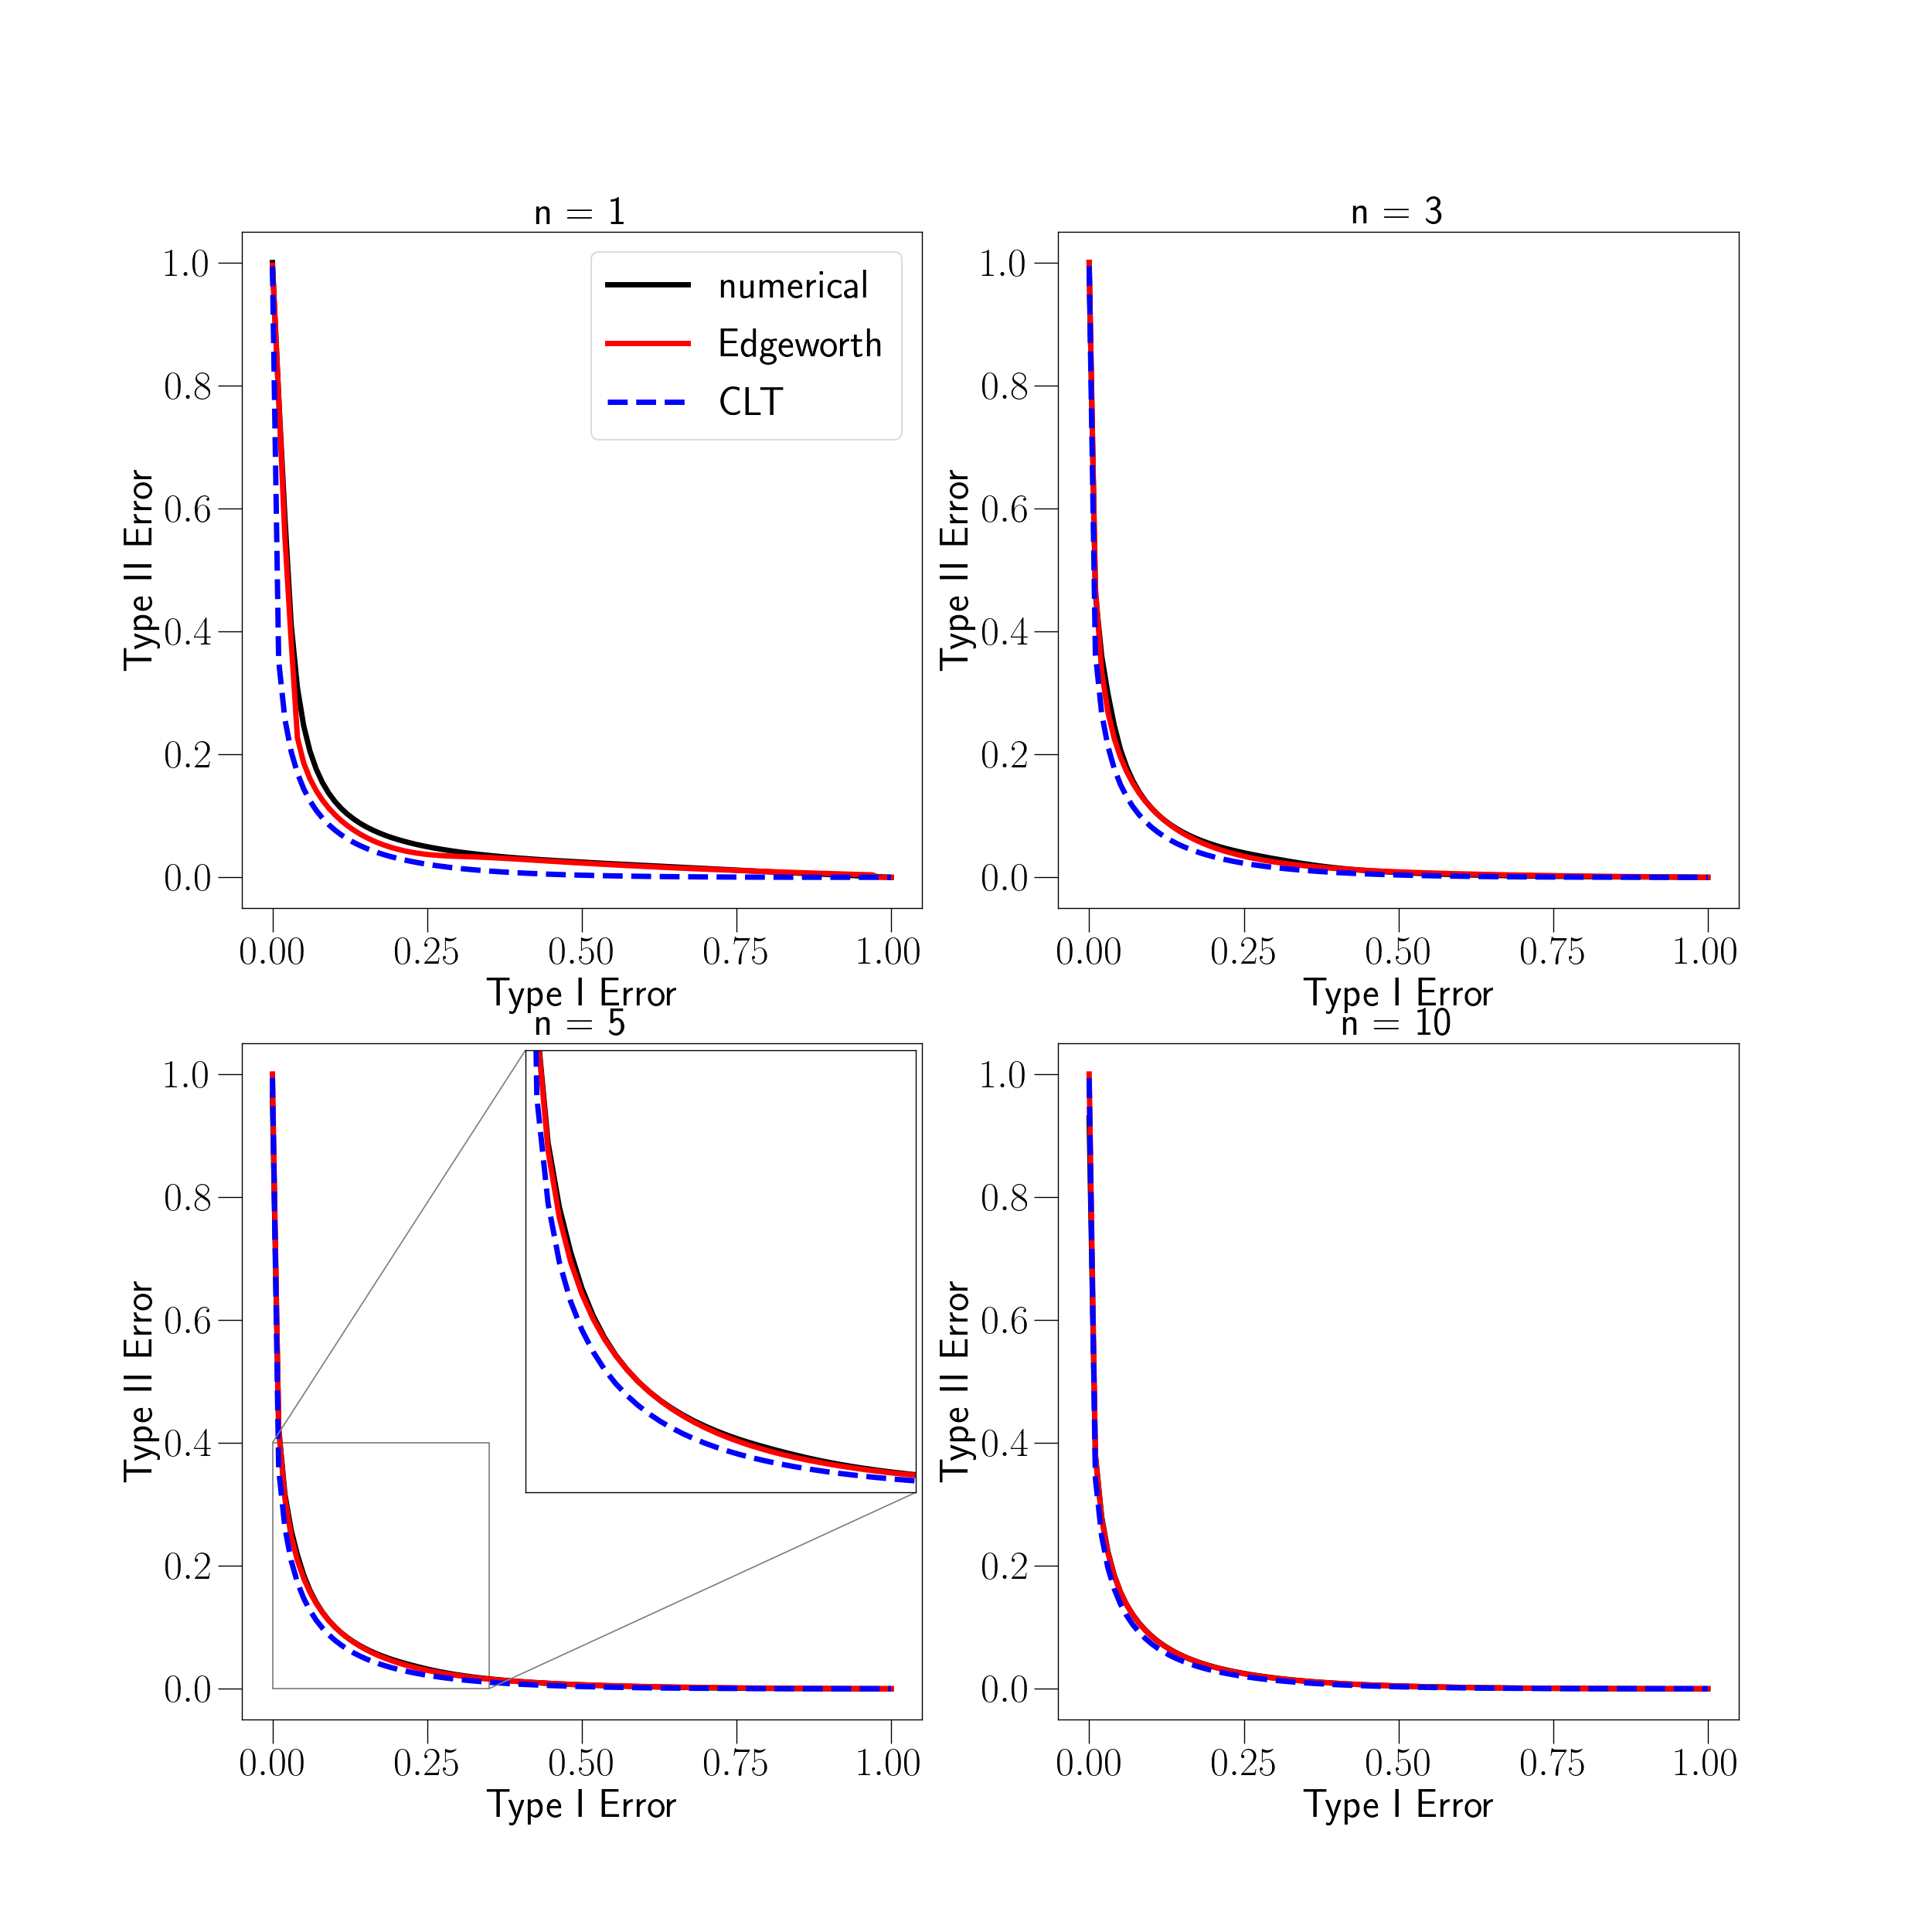

$$$$$ n:1
		Cumulants of Q: [2.049787068367863, 2.300502290673238, -6.427585333792244, 14.146204611206883]
		Cumulants of P: [-2.049787068367864, 2.3005022906732364, 6.427585333792241, 14.146204611206898]
		mu_f:2.7028840134114045
		CLT used 0.0013608932495117188 seconds.


/Users/qinqing/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/qinqing/repo/gdp-edgeworth/submit/edgeworth.py:220: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  delta[ii], _ = scipy.integrate.quad(integrand, left, right)
/Users/qinqing/repo/gdp-edgeworth/submit/edgeworth.py:220: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being 

		Edgeworth used 0.23944377899169922 seconds.
		Numerical used 1.5452191829681396 seconds.
$$$$$ n:3
		Cumulants of Q: [0.9089720138479932, 1.389110400983382, -2.042607352612531, 0.20497354645971466]
		Cumulants of P: [-0.9089720139299996, 1.3891104007755266, 2.0426073519996915, 0.2049735456955739]
		mu_f:2.671608112428377
		CLT used 0.0005400180816650391 seconds.
		Edgeworth used 0.21807503700256348 seconds.
		Numerical used 5.00044584274292 seconds.
$$$$$ n:5
		Cumulants of Q: [0.6030572126709878, 1.0059210964418517, -1.0301952372947962, -0.5752935319667967]
		Cumulants of P: [-0.6030571702972463, 1.0059211603715708, 1.0301952018773974, -0.5752939304258471]
		mu_f:2.6890044854067687
		CLT used 0.0008418560028076172 seconds.
		Edgeworth used 0.20255732536315918 seconds.
		Numerical used 8.218005180358887 seconds.
$$$$$ n:10
		Cumulants of Q: [0.33593387934292335, 0.6060231894269837, -0.3625188512755495, -0.42418766977575084]
		Cumulants of P: [-0.3359338796018973, 0.6060231886444831, 

In [2]:
""" Primal """

from expr_laplace import *

laplace_mu3_primal_all(num_compositions=[1, 3, 5, 10], save_fig=False)

<IPython.core.display.Javascript object>


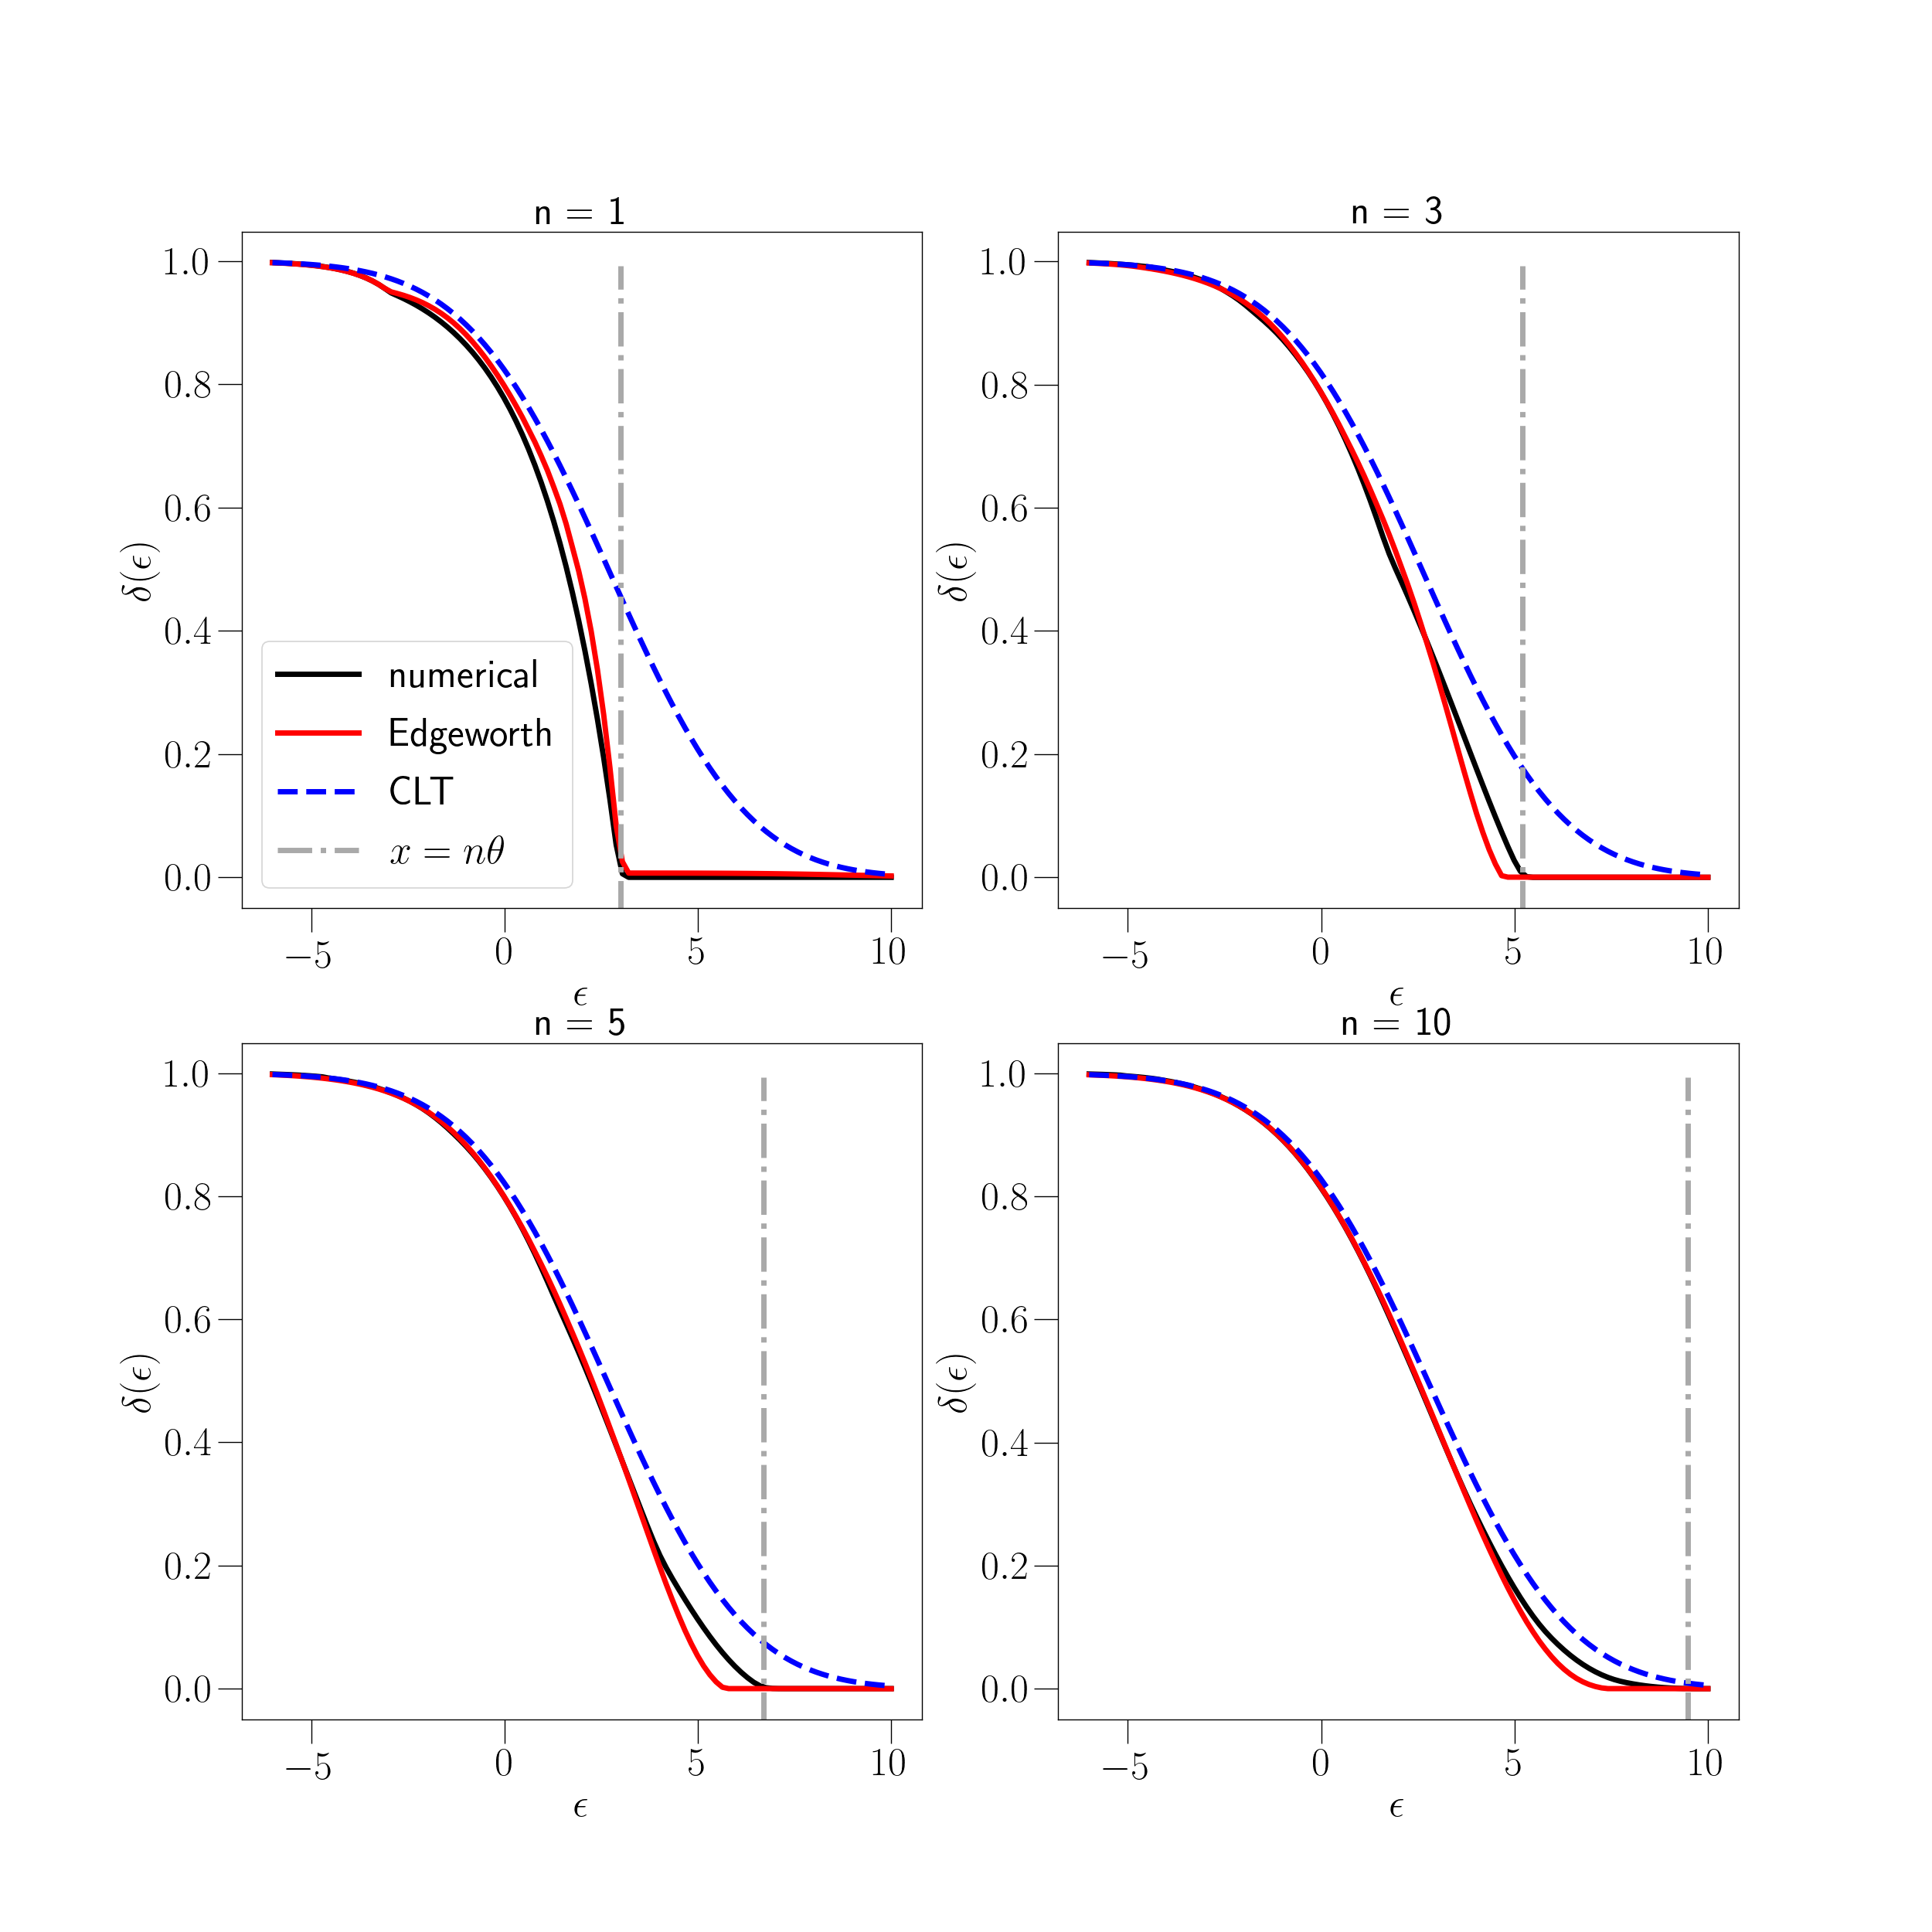

Cumulants of Q: [2.049787068367863, 2.300502290673238, -6.427585333792244, 14.146204611206883]


/Users/qinqing/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/qinqing/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Edgeworth used 2.2989439964294434 seconds.
Numerical used 1.1792120933532715 seconds.
Cumulants of Q: [0.9089720138479932, 1.389110400983382, -2.042607352612531, 0.20497354645971466]
Edgeworth used 2.0765700340270996 seconds.
Numerical used 4.338466167449951 seconds.
Cumulants of Q: [0.6030572126709878, 1.0059210964418517, -1.0301952372947962, -0.5752935319667967]
Edgeworth used 2.0882959365844727 seconds.
Numerical used 7.533522844314575 seconds.
Cumulants of Q: [0.33593387934292335, 0.6060231894269837, -0.3625188512755495, -0.42418766977575084]
Edgeworth used 2.0635697841644287 seconds.
Numerical used 16.68326997756958 seconds.


In [15]:
""" Dual """

from expr_laplace import *

laplace_mu3_dual_all(num_compositions=[1, 3, 5, 10], save_fig=False)

## Expr 2: Mixture Model (Noisy SGD) p=0.5/np.power(n, 0.25)

<IPython.core.display.Javascript object>


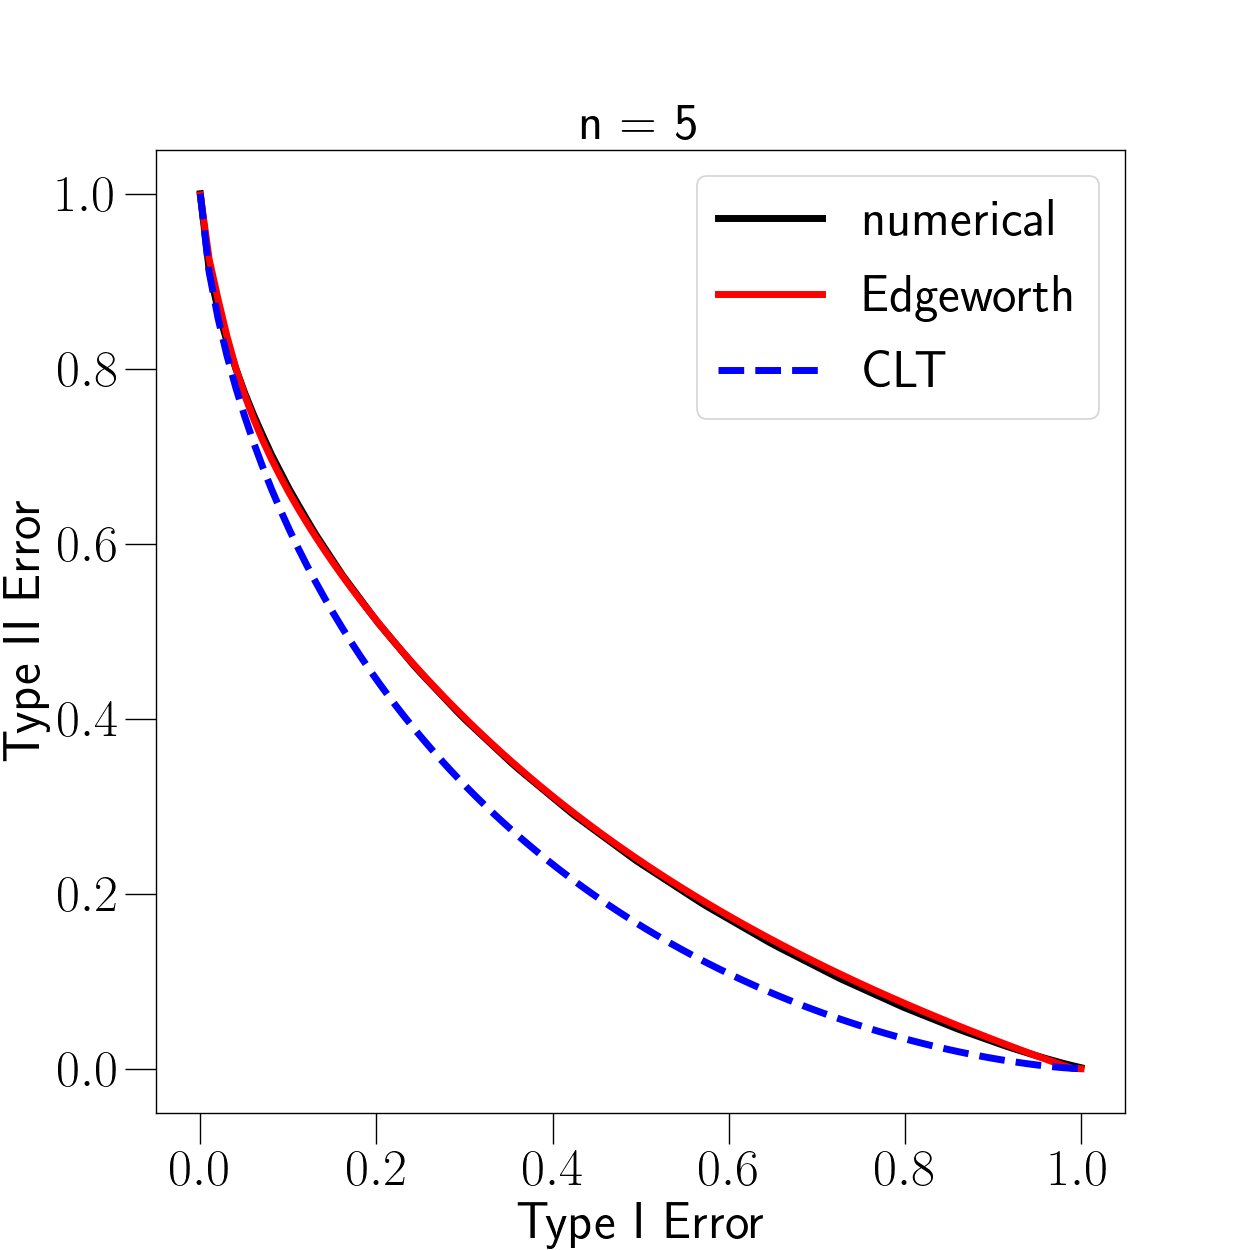

<IPython.core.display.Javascript object>


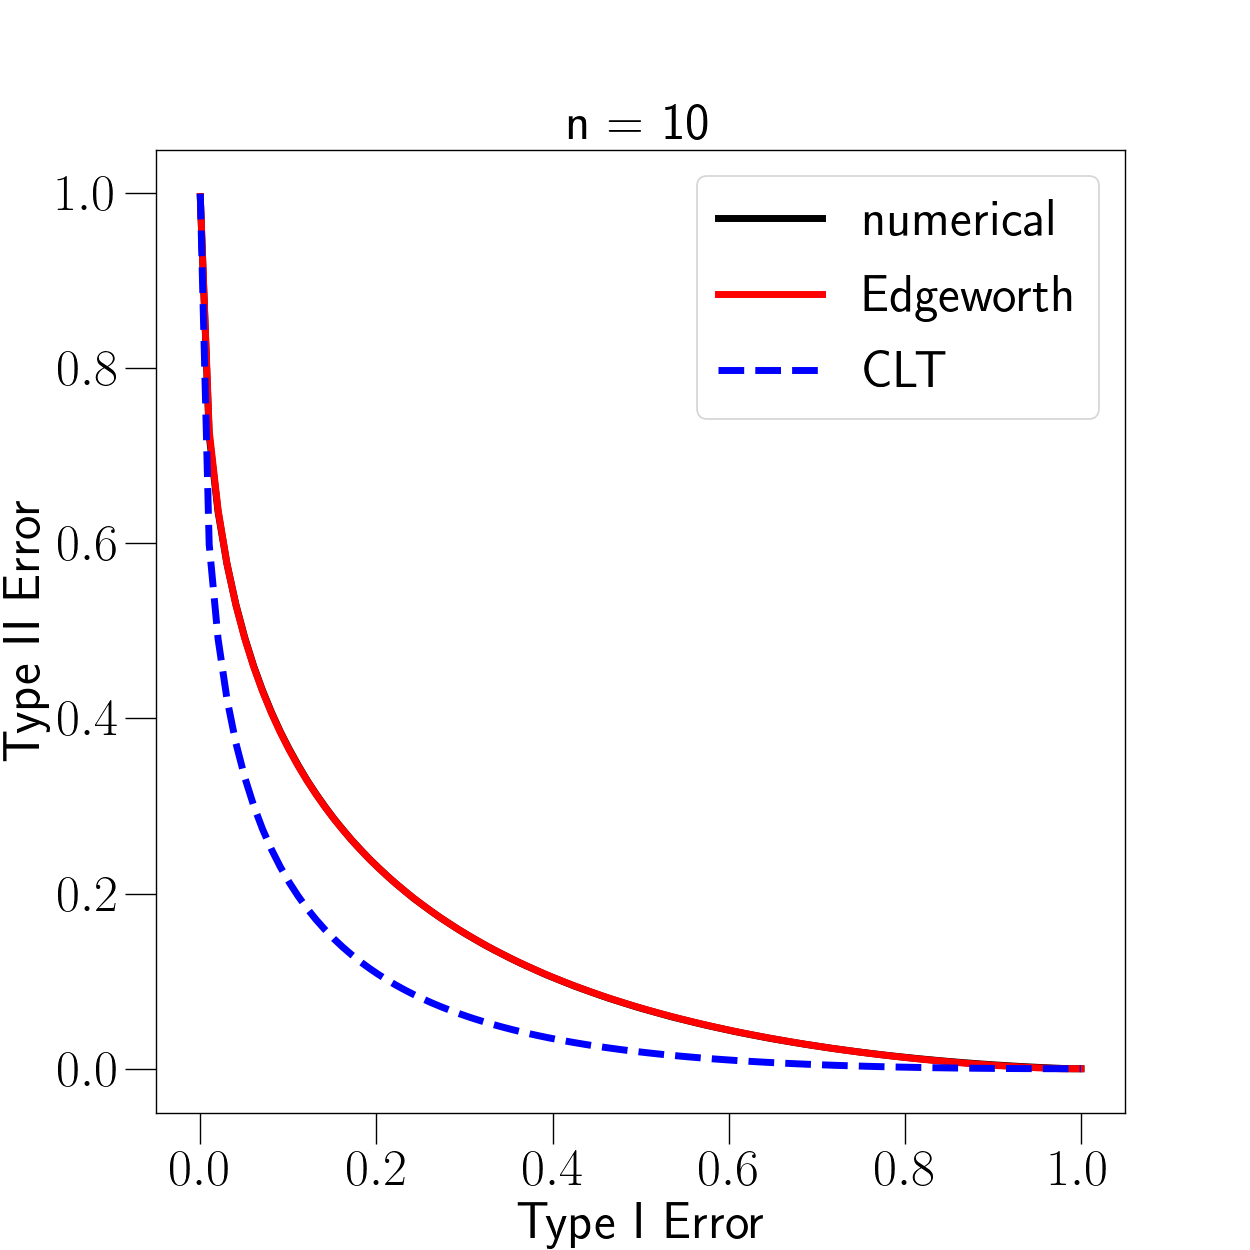

<IPython.core.display.Javascript object>


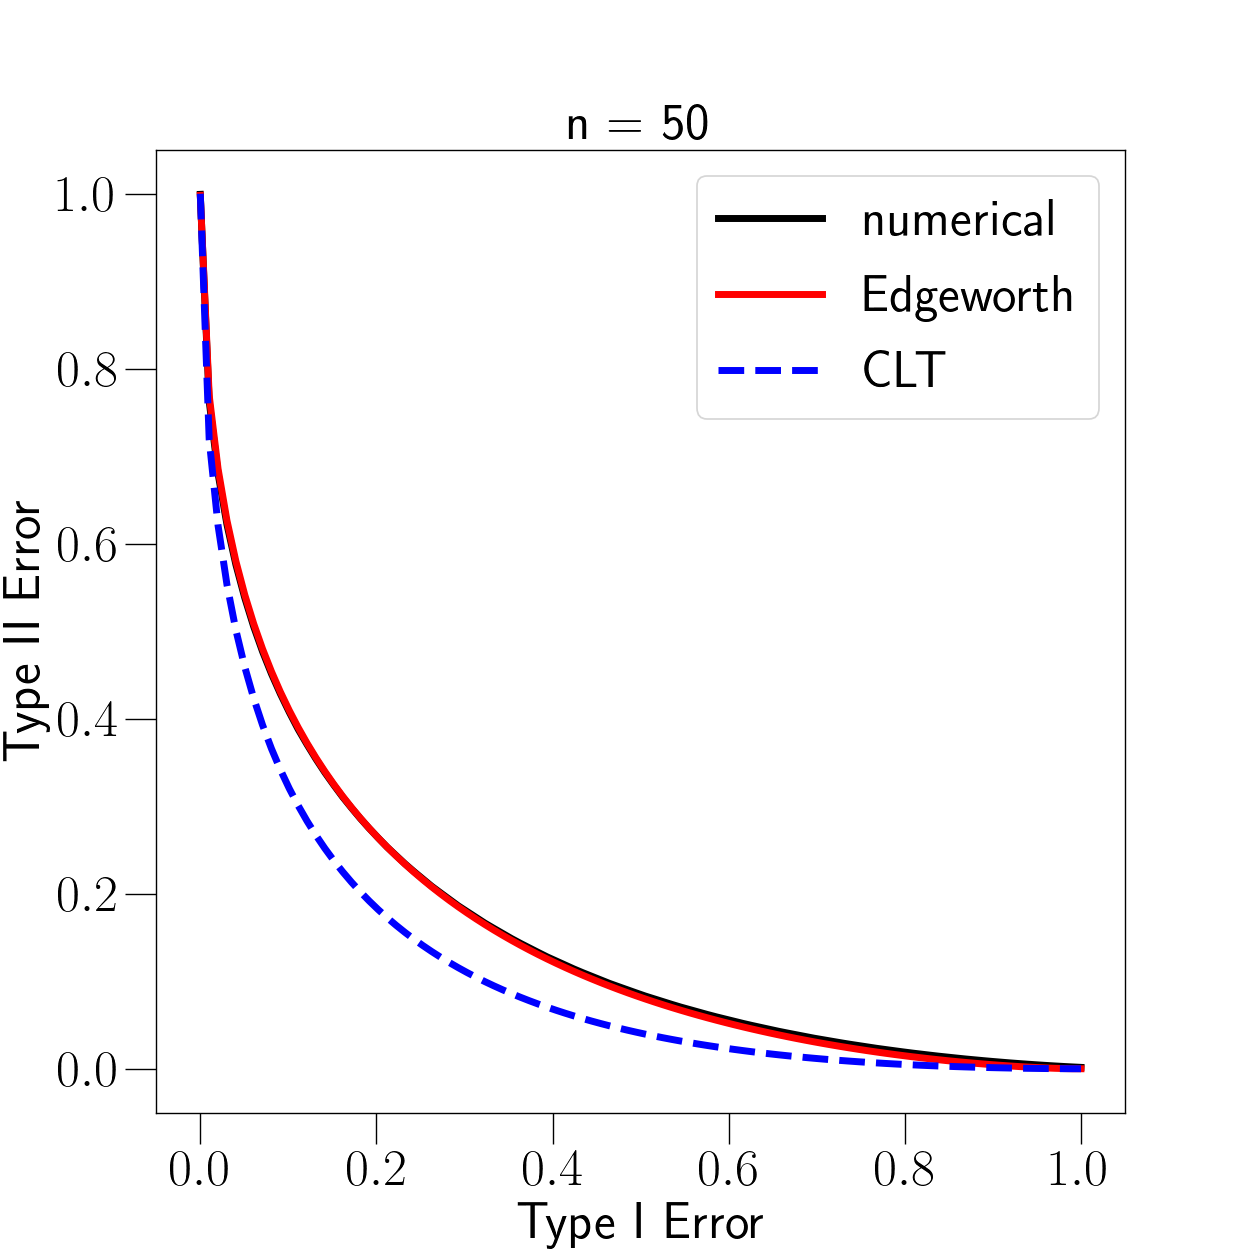

<IPython.core.display.Javascript object>


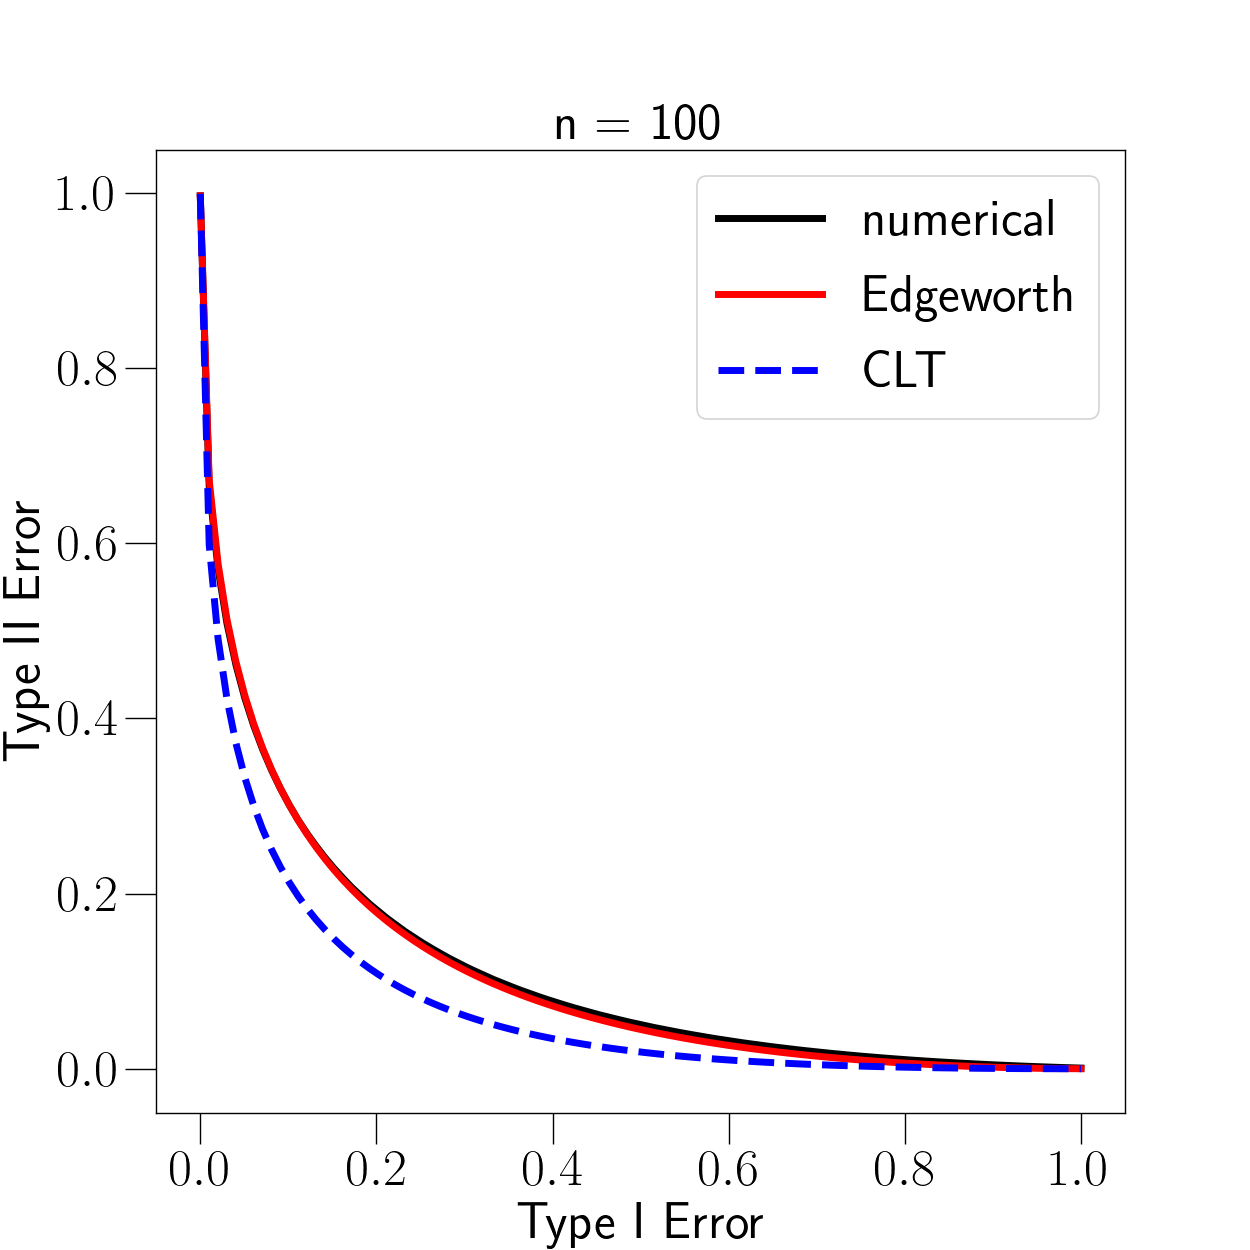

<IPython.core.display.Javascript object>


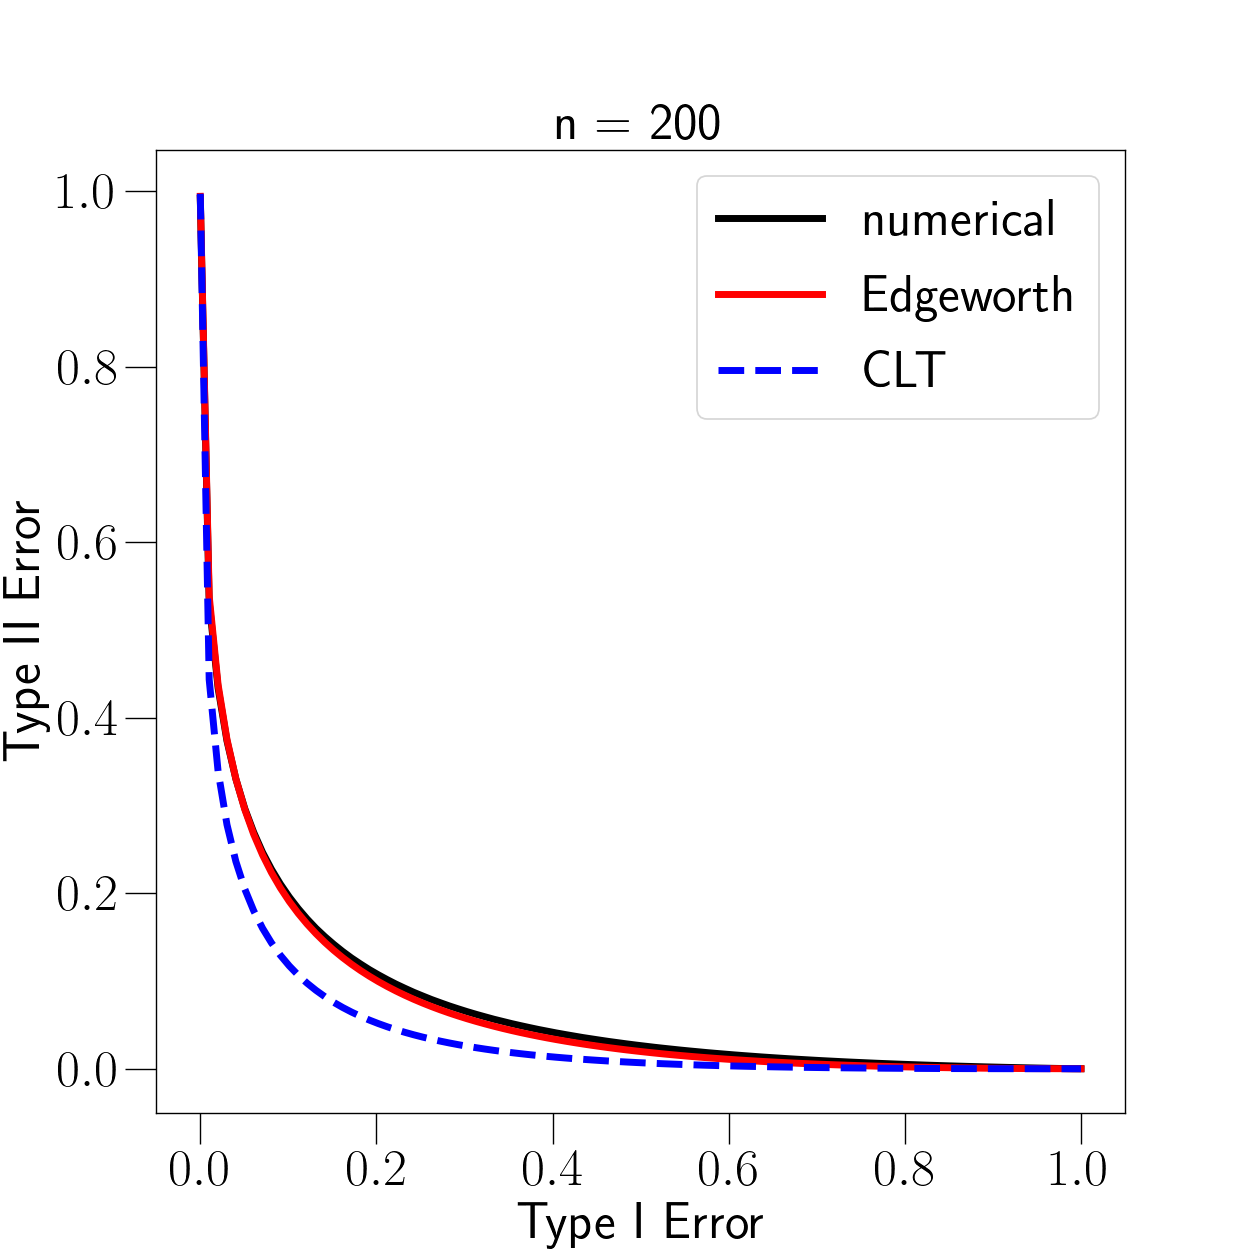

<IPython.core.display.Javascript object>


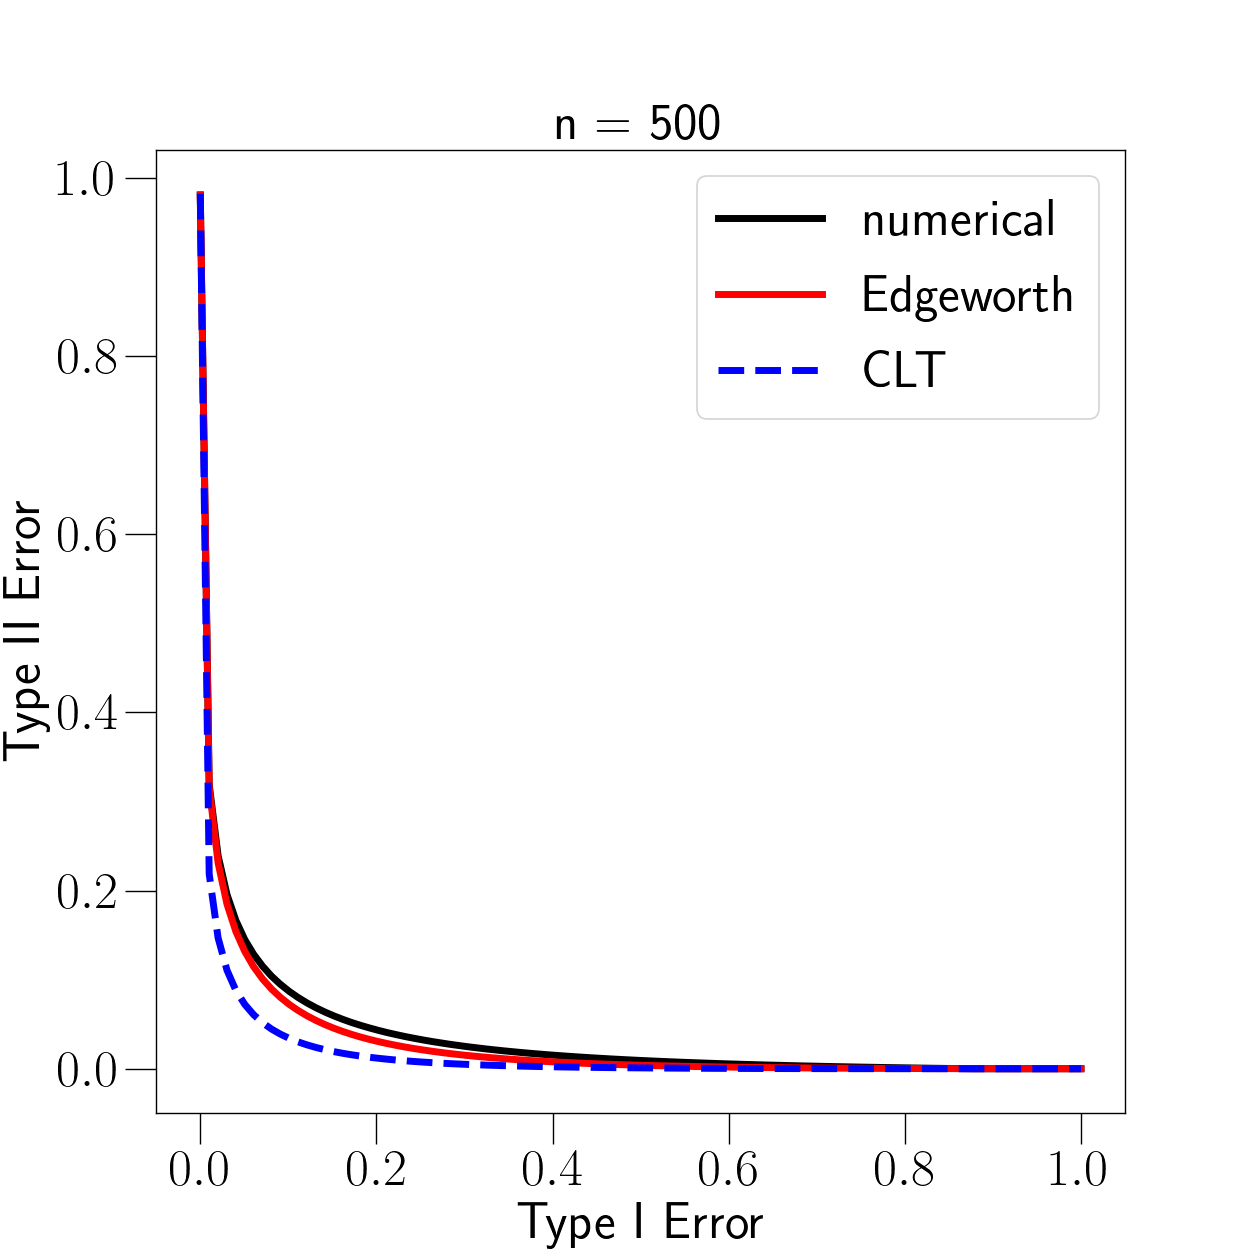

In [12]:
from expr_mixture import *

"""
for n in [5, 10, 50, 100, 200, 500]:
    mixture_primal(save_fig=True, num_composition=n, p=0.5/np.power(n, 0.25))
"""

"""
    Load Pickle and Replot Before Symmetrization
"""
import pickle
nn = [5, 10, 50, 100, 200, 500]
alpha = np.linspace(1e-7, 1-1e-7, 100)
for num_composition in nn:
    pickle_in = open("./mixture_primal_n{}_pquarter.pickle".format(num_composition), "rb")
    rst = pickle.load(
       pickle_in
    )
    pickle_in.close()

    f_numerical = rst['f_numerical'].reshape((100,))
    f_edgeworth = rst['f_edgeworth'].reshape((100,))
    f_clt = rst['f_clt'].reshape((100,))

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    line1, = ax.plot(alpha, f_numerical,linewidth=4, color="k", linestyle="-")
    line2, = ax.plot(alpha, f_edgeworth, linewidth=4, color="r")
    line3, = ax.plot(alpha, f_clt, linewidth=4, color="b", linestyle="--")
    ax.set_xlabel("Type I Error", fontsize=30)
    ax.set_ylabel("Type II Error", fontsize=30)
    ax.set_title("n = {}".format(num_composition), fontdict={"fontsize": 30})
    ax.legend(["numerical", "Edgeworth", "CLT"], prop={"size": 30})
    ax.xaxis.set_tick_params(size=18, labelsize=30)
    ax.yaxis.set_tick_params(size=18, labelsize=30)   

### Symmetrization

<IPython.core.display.Javascript object>


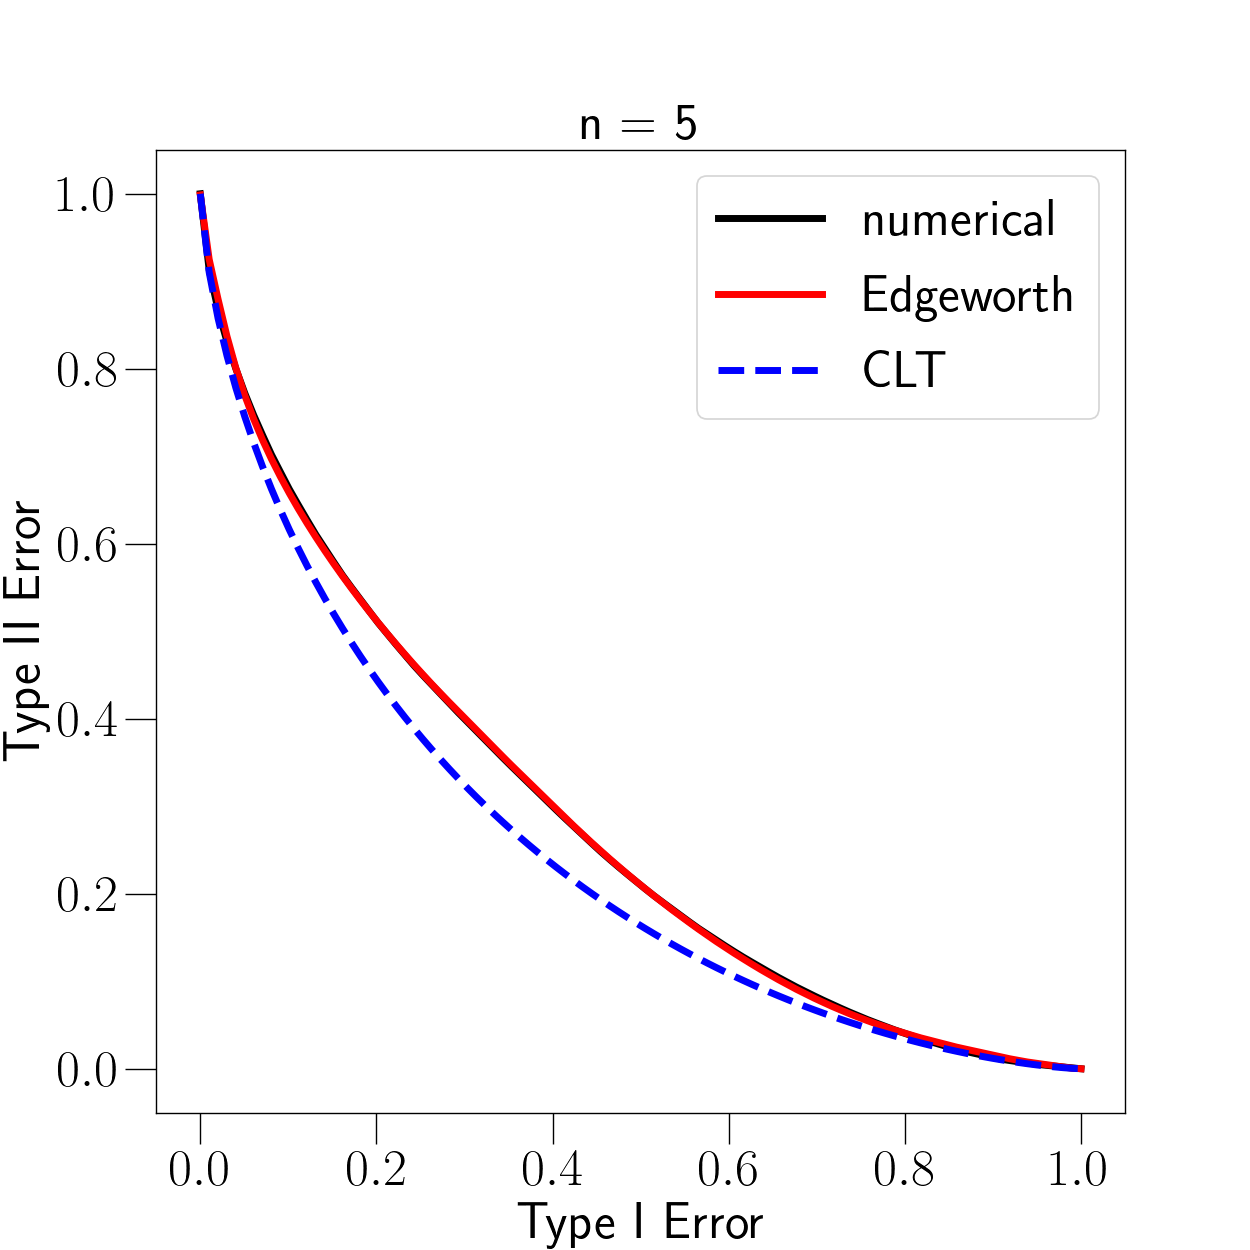

<IPython.core.display.Javascript object>


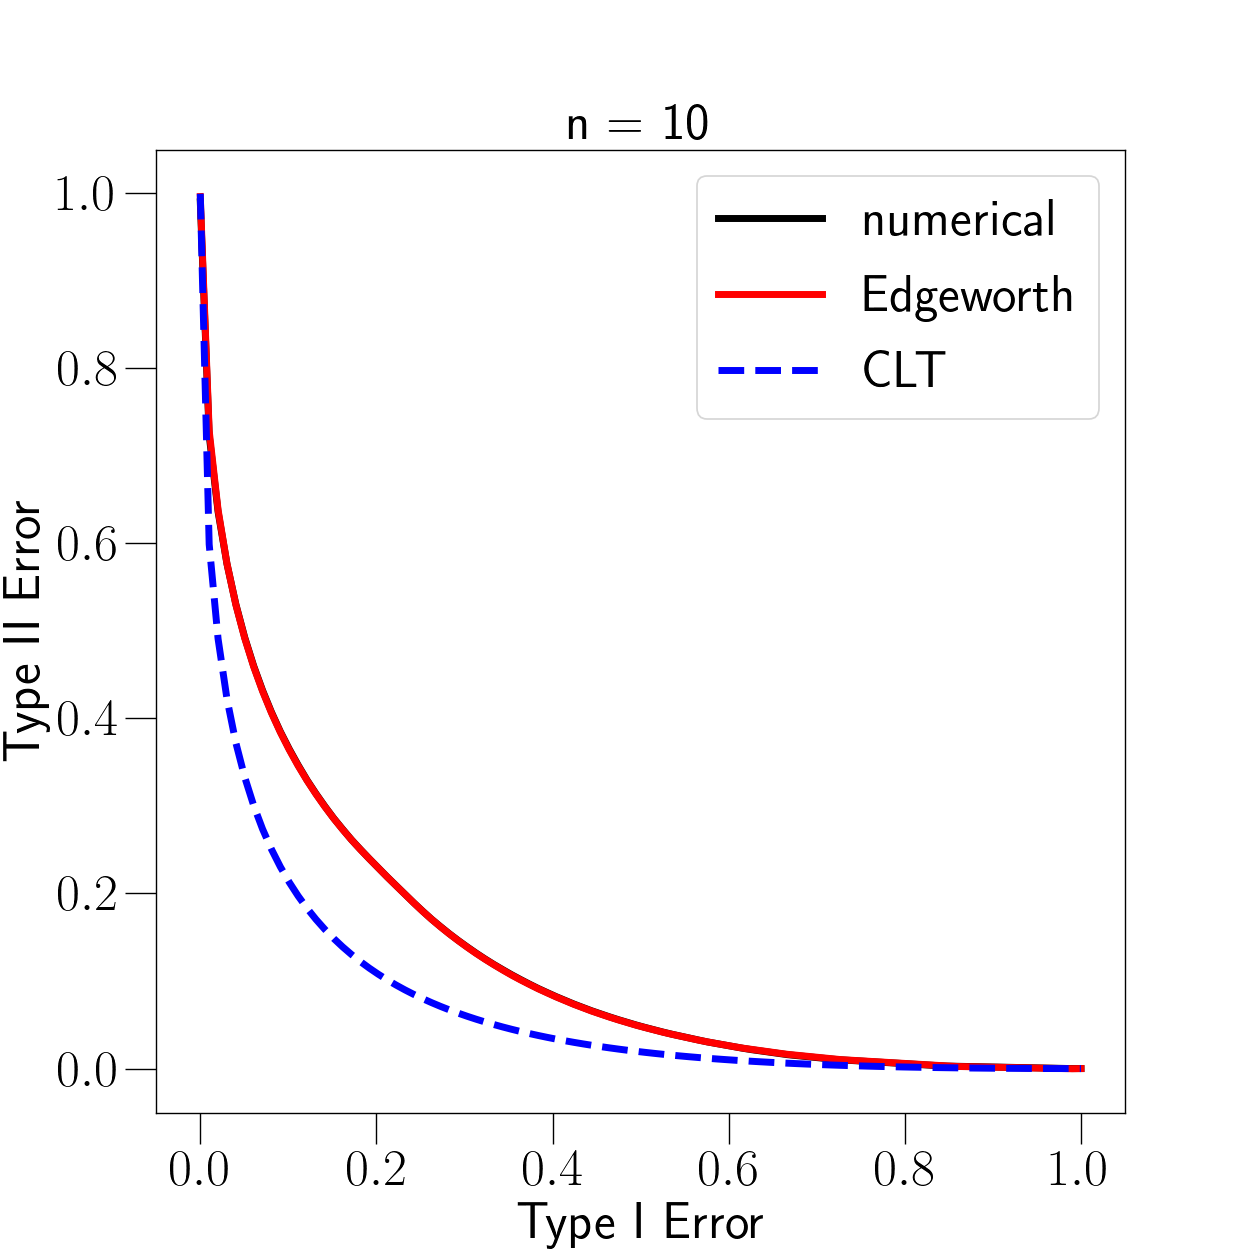

<IPython.core.display.Javascript object>


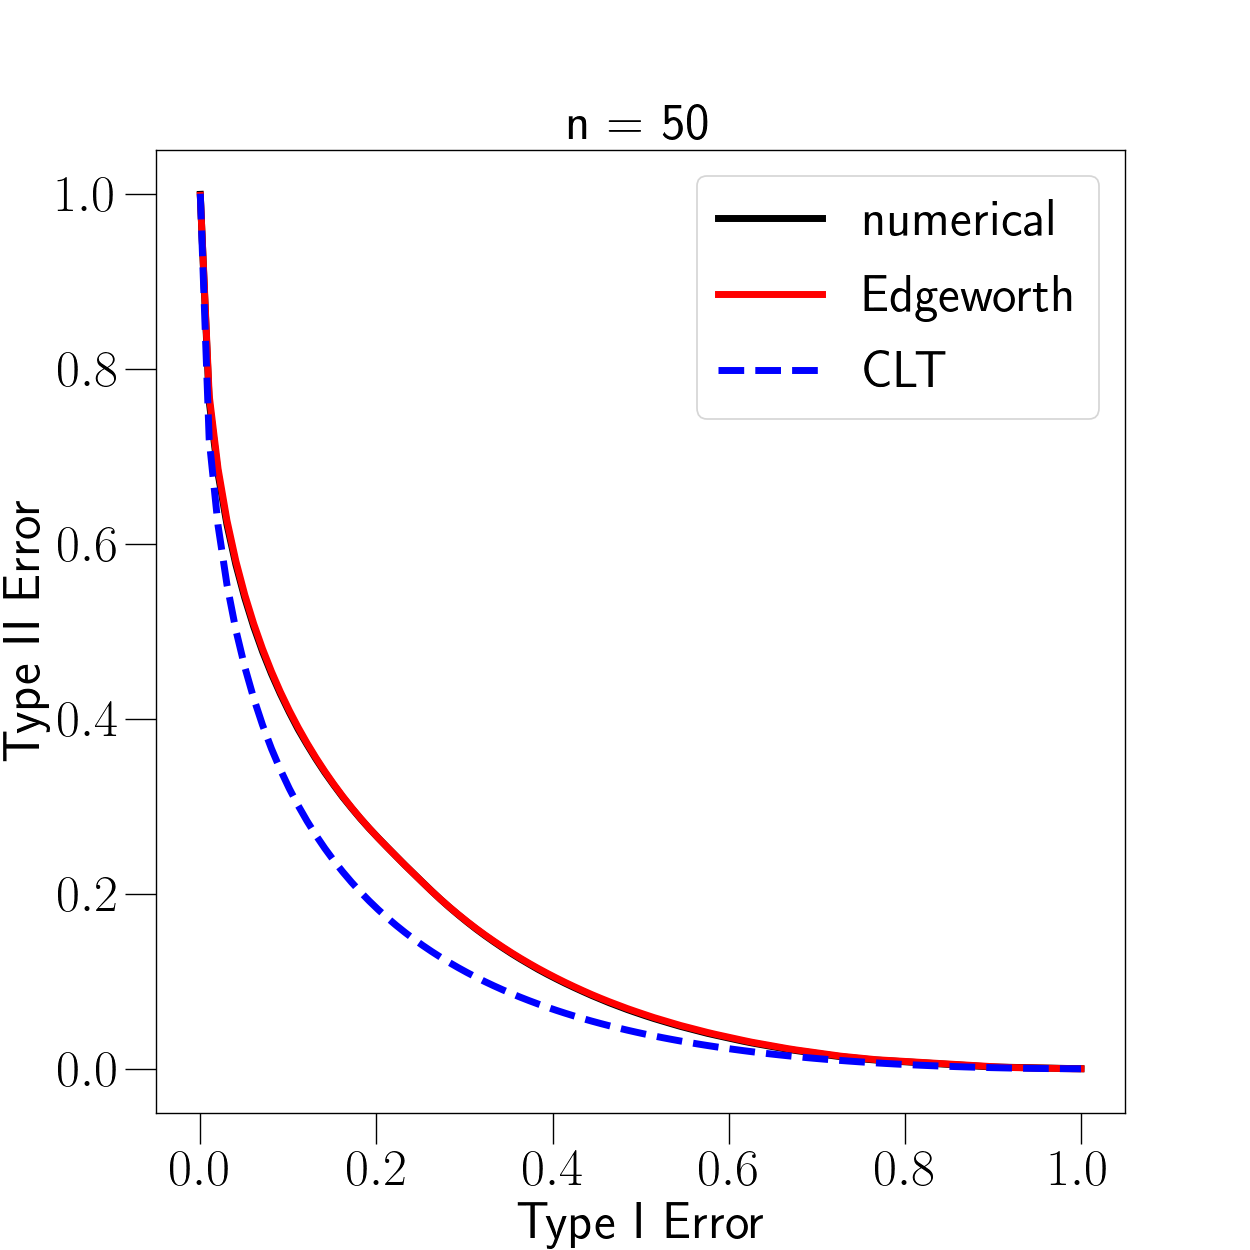

<IPython.core.display.Javascript object>


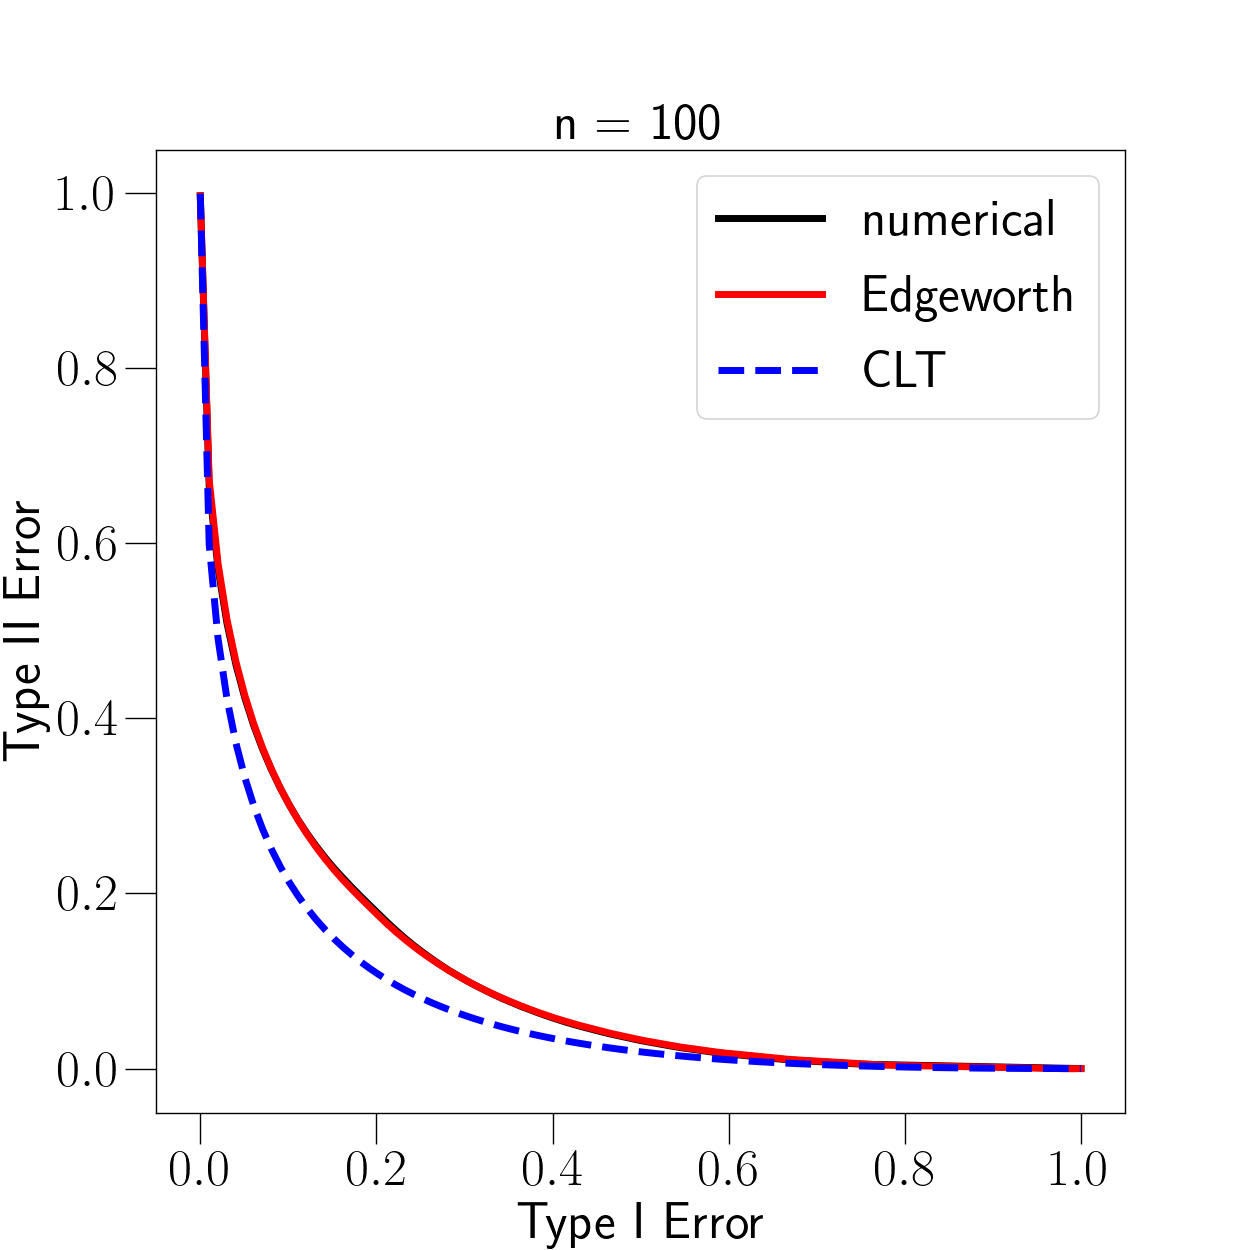

<IPython.core.display.Javascript object>


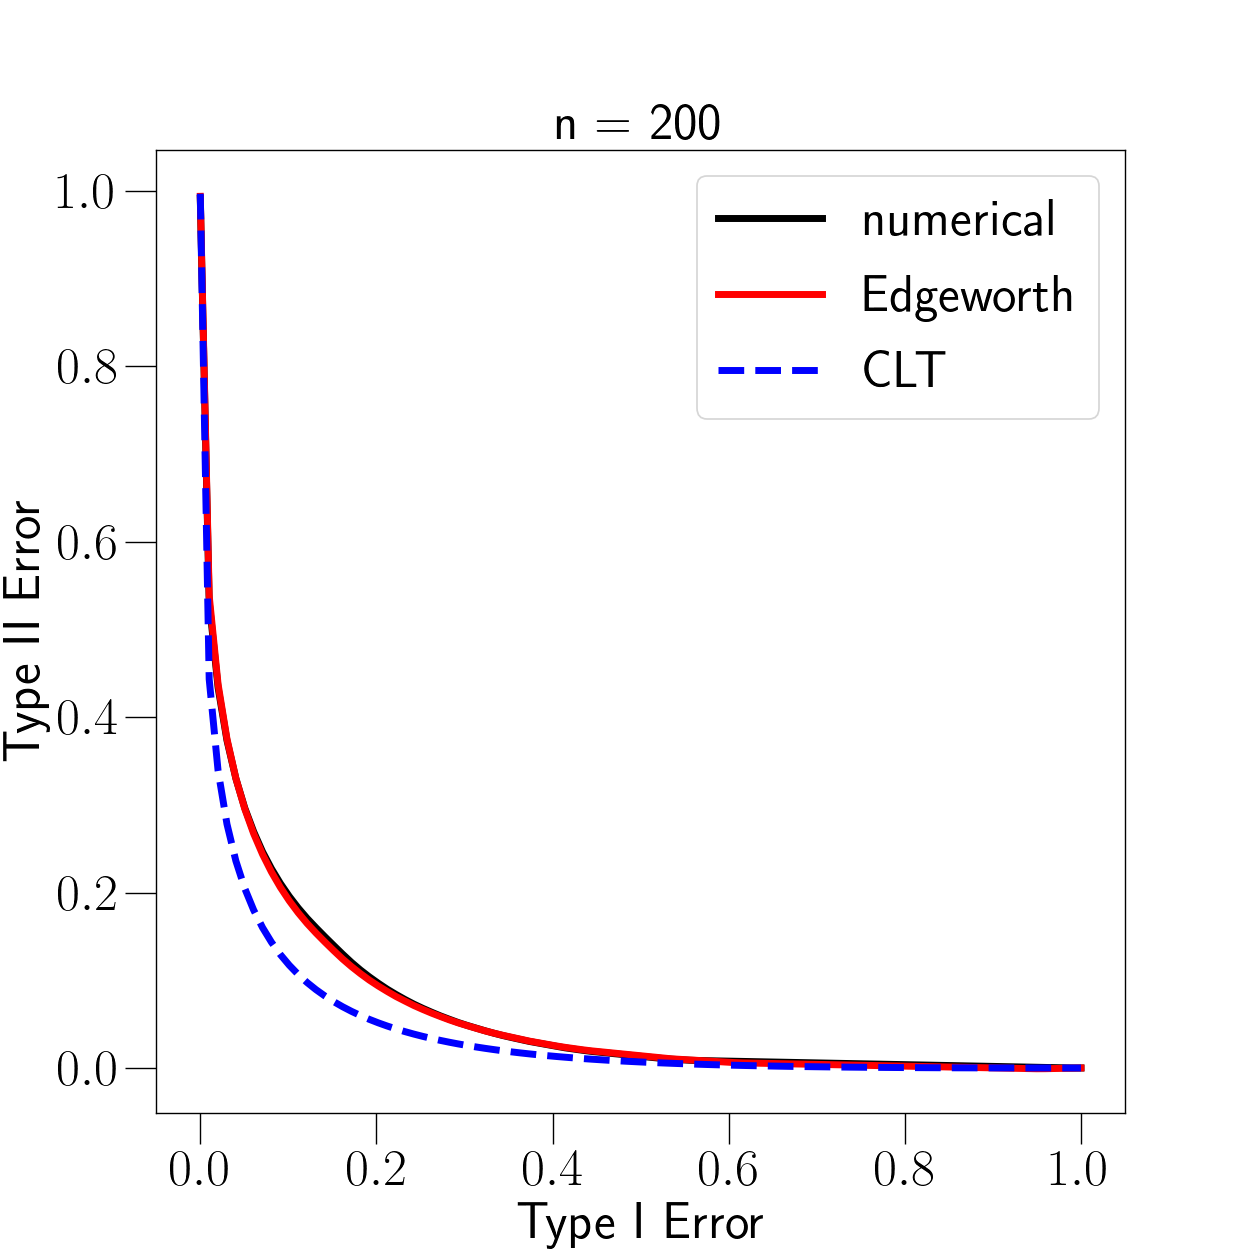

<IPython.core.display.Javascript object>


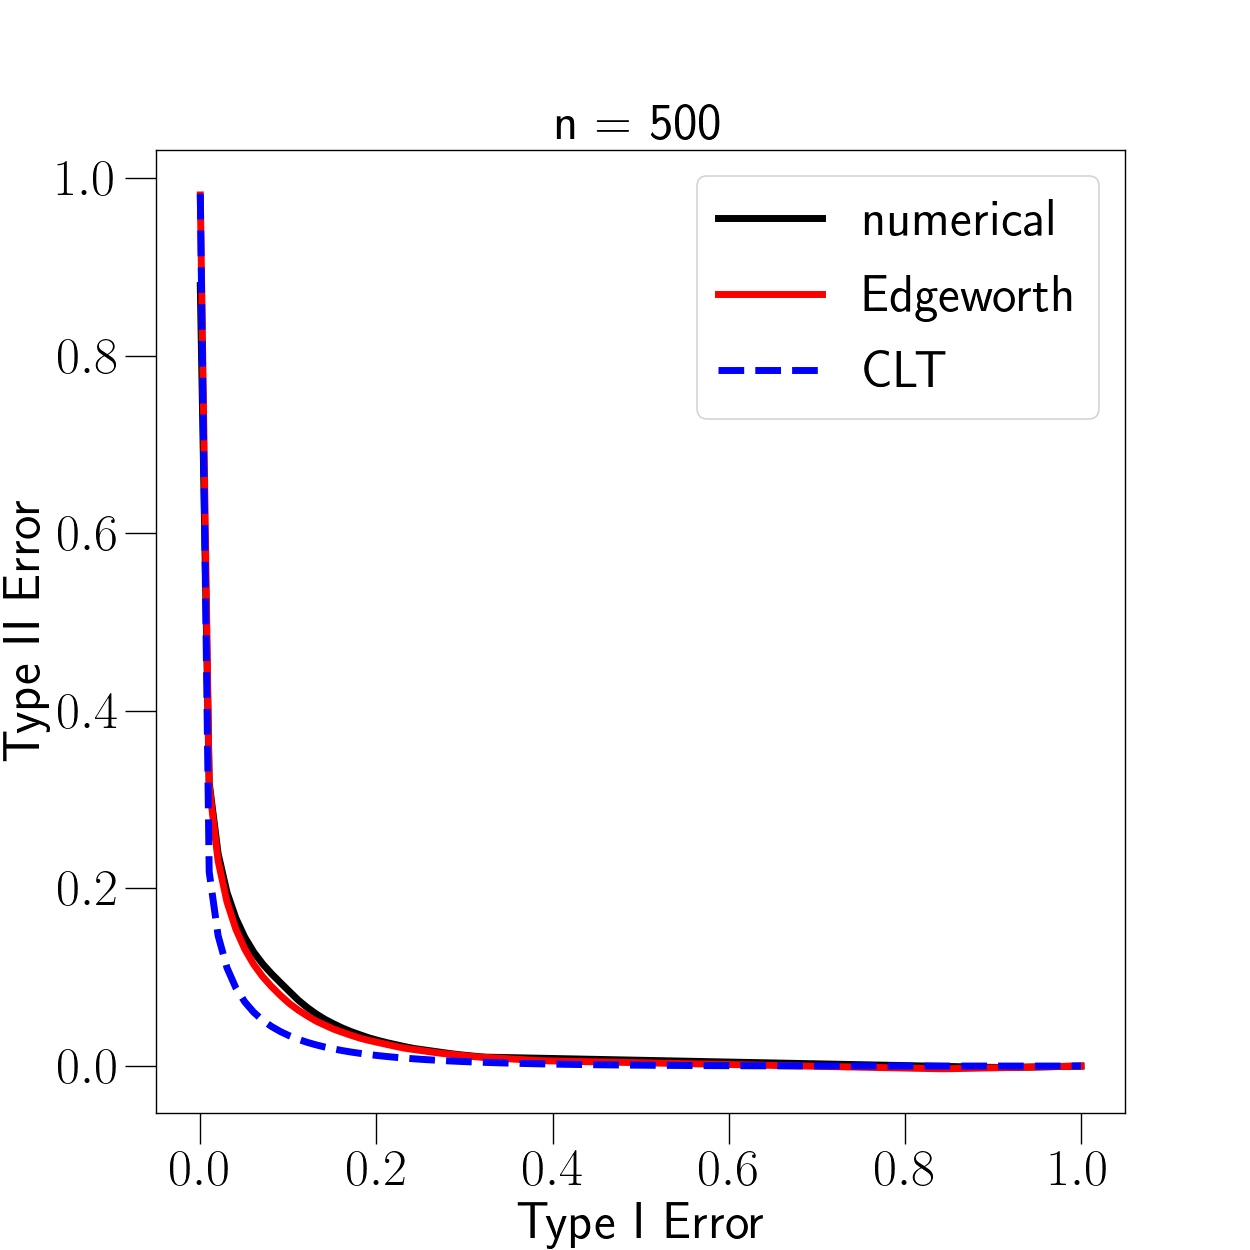

In [14]:
import pickle

""" 
    Symmetrize
"""
def compute_f_inv(fval, alpha):
    """ f_inv is essentially (fval, alpha)"""
    fval = np.reshape(fval, (len(fval),))
    # xp must be increasing
    finv = np.interp(alpha, xp=np.flip(fval), fp=np.flip(alpha))
    return finv

def min_f_finv(fval, alpha):
    finv = compute_f_inv(fval, alpha)      
    f_symm = np.minimum(fval, finv)
    return f_symm

def compute_symmetrized_f(fval, alpha):
    finv = compute_f_inv(fval, alpha)      
    f_symm = np.minimum(fval, finv)
    f_symm_conjugate = []
    yy = np.linspace(-100, 100, 5000)
    for y in yy:
        f_symm_conjugate.append(edgeworth.compute_f_conjugate(y, alpha, f_symm) )
    f_symm_biconj = []
    xx = np.linspace(0, 1, 500)
    for aa in alpha:
        f_symm_biconj.append(edgeworth.compute_f_conjugate(aa, yy, np.array(f_symm_conjugate)) )
    return f_symm_biconj
    
    
""" 
    Experiment
"""
nn = [5, 10, 50, 100, 200, 500]
for num_composition in nn:
    
    pickle_in = open("./mixture_primal_n{}_pquarter.pickle".format(num_composition), "rb")
    rst = pickle.load(pickle_in)
    pickle_in.close()

    f_numerical = rst['f_numerical'].reshape((100,))
    f_edgeworth = rst['f_edgeworth'].reshape((100,))
    f_clt = rst['f_clt'].reshape((100,))

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    line1, = ax.plot(alpha, compute_symmetrized_f(f_numerical, alpha), linewidth=4, color="k", linestyle="-")
    line2, = ax.plot(alpha, compute_symmetrized_f(f_edgeworth, alpha), linewidth=4, color="r")
    line3, = ax.plot(alpha, f_clt, linewidth=4, color="b", linestyle="--")
    ax.set_xlabel("Type I Error", fontsize=30)
    ax.set_ylabel("Type II Error", fontsize=30)
    ax.set_title("n = {}".format(num_composition), fontdict={"fontsize": 30})
    ax.legend(["numerical", "Edgeworth", "CLT"], prop={"size": 30})
    ax.xaxis.set_tick_params(size=18, labelsize=30)
    ax.yaxis.set_tick_params(size=18, labelsize=30)